# Traffic Sign Classification

In this project we will create and train Convolutional Neural Network for traffic signs classification using Keras and Tensorflow.

Import packages:

In [2]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random

from matplotlib.image import imread
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Plot sample images:

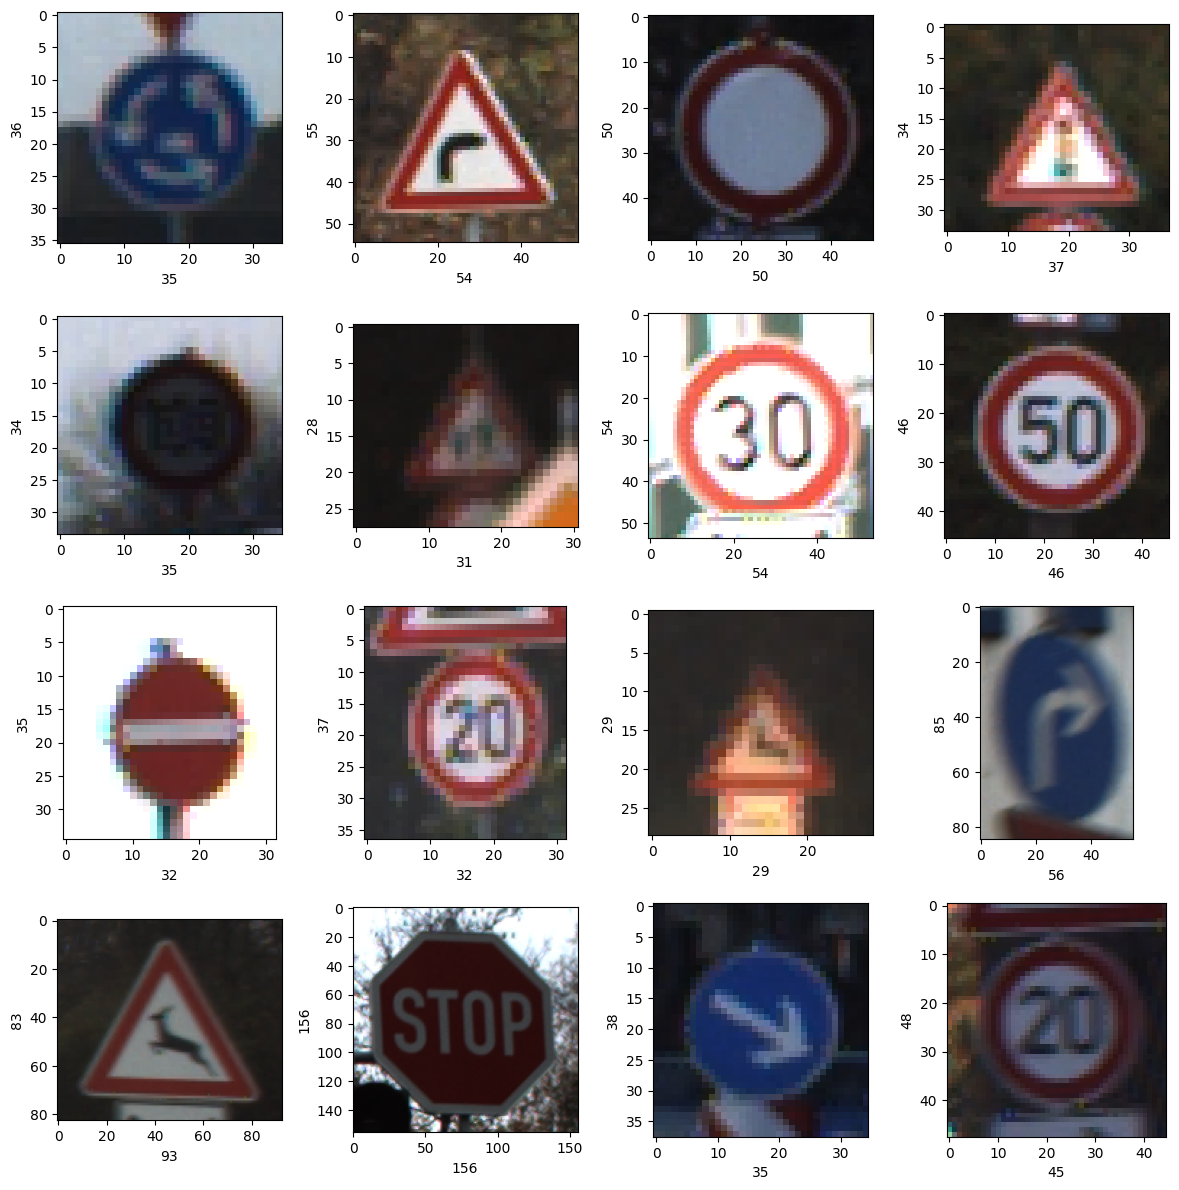

In [3]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "data/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

It can be noticed, that they have different dimentions.

In [5]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'data/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [6]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


Reshape all the images into (50,50), which is the avarage shape of all images.

In [8]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'data/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

Converting into numpy array and normalizing:

In [9]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [10]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [11]:
images.shape

(39209, 50, 50, 3)

Check number of images for each class:

<Axes: xlabel='0'>

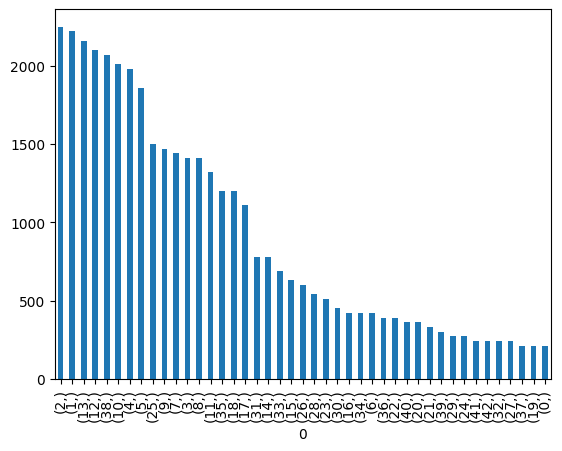

In [28]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.plot(kind='bar')

We can see that data is rather unbalanced.

In [31]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42, stratify=label_id)

<Axes: xlabel='0'>

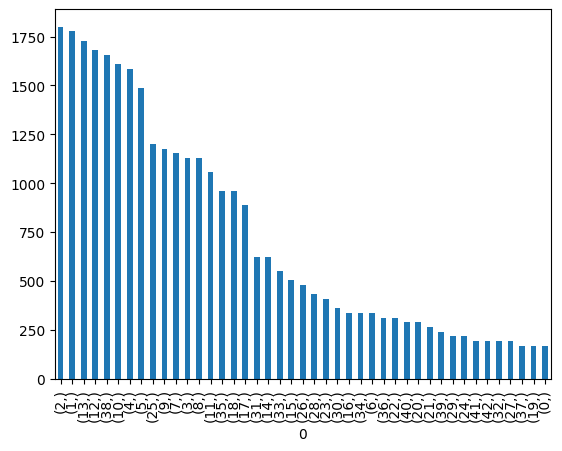

In [35]:
pd.DataFrame(y_train).value_counts().plot(kind='bar')

<Axes: xlabel='0'>

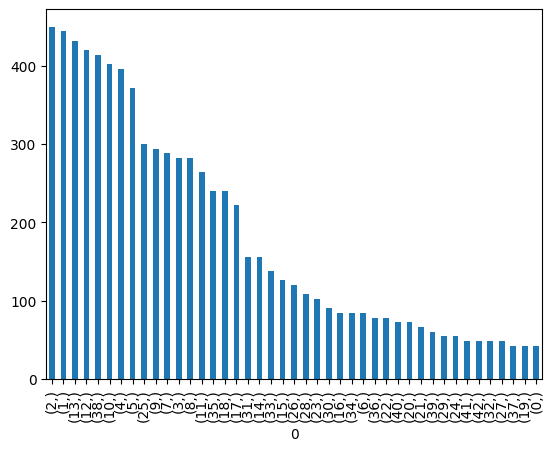

In [36]:
pd.DataFrame(y_val).value_counts().plot(kind='bar')

After using stratification, the distribution of labels is similar in train and val set.

Converting classes to categorical data:

In [42]:
#keras has a built-in function for one-hot encoding.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

Defining model:

In [49]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

c:\projects\traffic_sign_classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'f1_score'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

Training the model:

In [53]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 30s - 123ms/step - accuracy: 0.3043 - f1_score: 0.1790 - loss: 2.4895 - val_accuracy: 0.6764 - val_f1_score: 0.5010 - val_loss: 1.3032
Epoch 2/10
246/246 - 28s - 116ms/step - accuracy: 0.6195 - f1_score: 0.5083 - loss: 1.1880 - val_accuracy: 0.8851 - val_f1_score: 0.8248 - val_loss: 0.4847
Epoch 3/10
246/246 - 28s - 116ms/step - accuracy: 0.7502 - f1_score: 0.6730 - loss: 0.7743 - val_accuracy: 0.9373 - val_f1_score: 0.9072 - val_loss: 0.2891
Epoch 4/10
246/246 - 29s - 117ms/step - accuracy: 0.8048 - f1_score: 0.7483 - loss: 0.6011 - val_accuracy: 0.9630 - val_f1_score: 0.9531 - val_loss: 0.2289
Epoch 5/10
246/246 - 29s - 119ms/step - accuracy: 0.8384 - f1_score: 0.7886 - loss: 0.4987 - val_accuracy: 0.9723 - val_f1_score: 0.9714 - val_loss: 0.1450
Epoch 6/10
246/246 - 30s - 121ms/step - accuracy: 0.8601 - f1_score: 0.8198 - loss: 0.4275 - val_accuracy: 0.9764 - val_f1_score: 0.9730 - val_loss: 0.1251
Epoch 7/10
246/246 - 30s - 122ms/step - accuracy: 0.8749 - f1_sc

<Axes: >

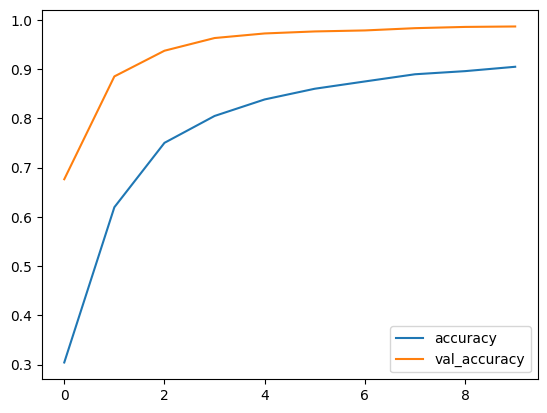

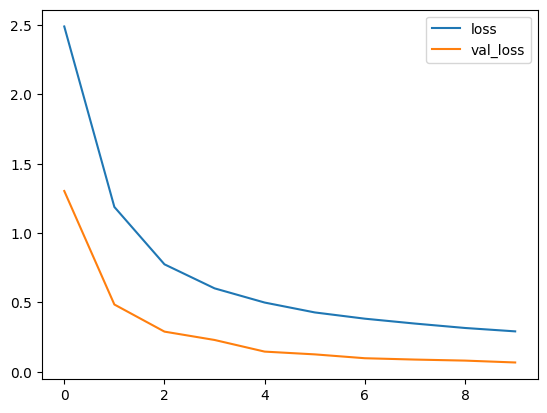

In [54]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Evaluating the model on test data:

In [55]:
#defining a function that will scale images

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [58]:
test_path = 'data/Test'
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [59]:
test = pd.read_csv('data/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [63]:
y_pred_proba = model.predict(test_images)
y_pred = y_pred_proba.argmax(axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [64]:
y_pred

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

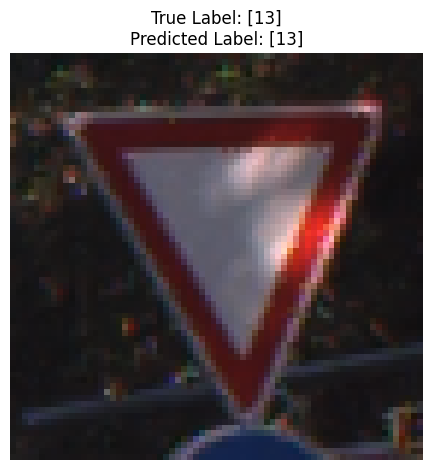

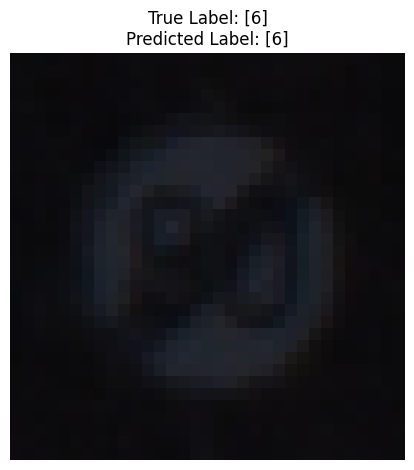

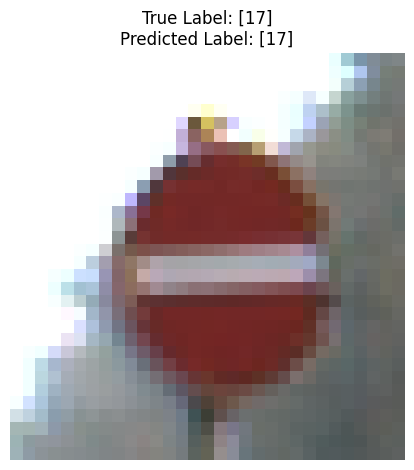

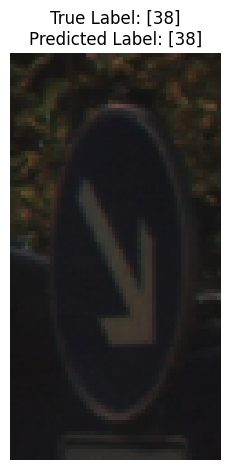

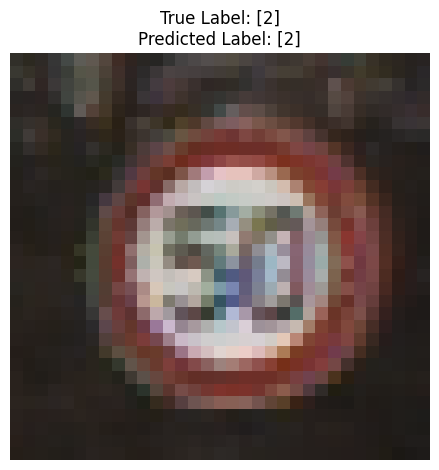

In [90]:
for i in range(5):
    sample_row = test.sample()
    filename = sample_row['Path'].iloc[0]
    index = sample_row.index
    img = plt.imread(os.path.join('data', filename))
    true_label = y_test[index]
    pred_label = y_pred[index]
    plt.imshow(img)
    plt.axis('off')

    plt.title(f"True Label: {true_label}\nPredicted Label: {pred_label}")
    plt.tight_layout()
    plt.show()

In [91]:
from sklearn.metrics import f1_score, accuracy_score

In [92]:
#Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate F1 score
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test F1 Score (Macro): {test_f1:.4f}")

Test Accuracy: 0.9510
Test F1 Score (Macro): 0.9408


Save the model

In [93]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']